***
## [October 2018] Undulator spectra adsorption dips: gold mesh vs diode
### Abstract:
The full undulator scans with the photodiode show absorption edges, including what appears to be oxygen. Is this SiO2 on the photodiode, or is it somewhere on the beamline?

To test this, compare spectra with the same settings taken with the gold mesh and with the photodiode
***

In [2]:
from BLOCH_beamline import *

data_folder = Path('Data/')

%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 27.11.2018 

	Latest change: better HDF5 handling



### Measurement details

|Electrometer channel|Measurement|
|-|-|
| b110a_ctl_em02_ch03 |Current at the M4 photodiode (M4 diagnostic position 78.98)|
| b110a_ctl_em02_ch01 |Gold mesh (M4 diagnostic position 137)|
| b110a_ctl_em03_ch01 | Exit slit left baffle |
| b110a_ctl_em03_ch02 | Exit slit right baffle |

|Beamline parameter | Setting |
|-|-|
| Ring current | 200mA|
| EPU (gap, phase) | (19, 0)|
| F.E. mm(1x,2x, 1y, 2y) | (-2.49, -5.58, -3.2, -5) |
| F.E. gap (x,y) | (-8.07, -8.2) |
| F.E. offset (x,y) | (1.55, 0.9) |
| M1 (pitch,lateral) | (-1760\*, 1800) |
| Mono baffle gap (h, v) |(15,15)|
| Mono baffle offset (h, v) | (-0.2,0.7)|
| M3 baffle gap (h, v) | (50mm,19mm)|
| Exit slit gap (h, v) | (130um, 1200um) |
| M4 baffle gap (h, v) | (50mm,19mm)|

\* Feedback loop on

| Filename | Scan | EPU gap | hv range | Detector |
|-|-|-|-|-|
|undu_mono_scan4| 1370 | 19 | 200-1000 step 1|Photodiode| 
|undu_mono_scan4| 1371 | 19 | 10-1000 step 0.5|Gold mesh|



In [3]:
dataFile=data_folder/'undu_mono_scan4.h5'

goldMesh = HDF5loadscan(dataFile,1371)
goldMesh['mono_energy_calibrated']=[n*(0.96) for n in calibrateMonoEnergy(goldMesh['mono_energy'])]

goldMesh['Current'] = [((ii)/1000) for ii in goldMesh['b110a_ctl_em02_ch01']]

photoDiode = HDF5loadscan(dataFile,1370)
photoDiode['mono_energy_calibrated']=[n*(0.96) for n in calibrateMonoEnergy(photoDiode['mono_energy'])]
photoDiode['Current'] = [((ii*-1)/1000) for ii in photoDiode['b110a_ctl_em02_ch03']]
photoDiode['flux'] = [currentToFlux(I,hv) for I,hv in zip(photoDiode['Current'],photoDiode['mono_energy_calibrated'])]


Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018


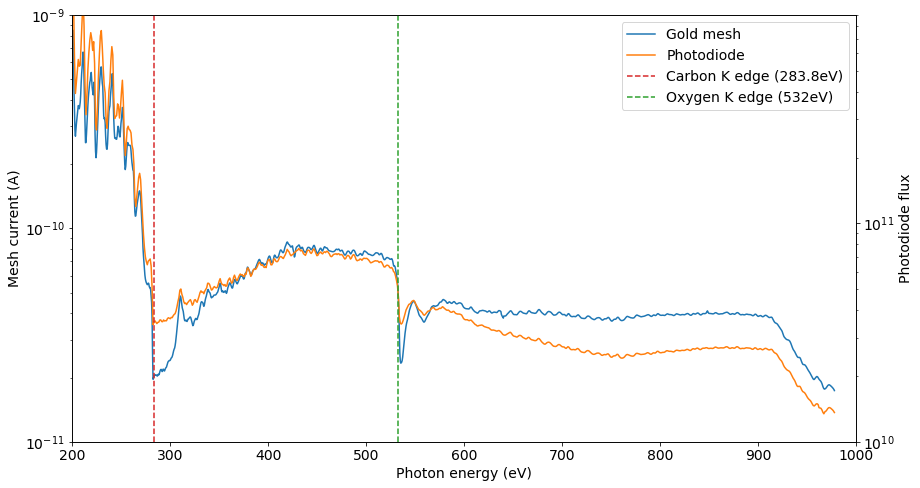

In [4]:
fig=plt.figure(figsize=(13,7))

ax1 = plt.gca()
ax2 = ax1.twinx()

trace1=ax1.plot(goldMesh['mono_energy_calibrated'],goldMesh['Current'],label='Gold mesh')
trace2=ax2.plot(photoDiode['mono_energy_calibrated'],photoDiode['flux'],color='tab:orange',label='Photodiode')

ax1.set_ylabel('Mesh current (A)')
ax1.set_yscale('log')
ax1.set_ylim([1e-11,1e-9])

ax2.set_ylabel('Photodiode flux')
ax2.set_yscale('log')
ax2.set_ylim([1e10,9e11])
ax1.set_xlim([200,1000])

trace3 = ax2.plot([283.8,283.8],[1e10,1e12],linestyle='--',color='tab:red',label='Carbon K edge (283.8eV)')
trace4 = ax2.plot([532,532],[1e10,1e12],linestyle='--',color='tab:green',label='Oxygen K edge (532eV)')

traces = trace1 + trace2+trace3+trace4


labels = [trace.get_label() for trace in traces]
ax2.legend(traces,labels)
ax1.set_xlabel('Photon energy (eV)')

plt.tight_layout()
plt.show()

***
### Conclusion:

The absorption features are not artifacts of the diode.

The energy scale should not be trusted too much here. Even after applying the last calibration we have, I still have to multiply by 0.96 to bring these edges to the standard literature value for what they (probably) are: carbon and oxygen

Also I do not currently have a mapping from mesh current to flux, so the two curves cannot be directly compared.

Both measurements indicate that half the flux is lost at the carbon edge, recovering by about 350eV.

The oxygen edge again causes a 50% drop in flux, but recovers within about 40eV

***
***